In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

Downloading of Tallinn's neighbourhoods borders from Tallinn's geoportal - https://www.tallinn.ee/en/geoportal/spatial-data

In [2]:
import requests, zipfile
from io import BytesIO

url = 'https://www.tallinn.ee/est/g6497s92804'

req = requests.get(url)

In [3]:
zipfile = zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('Tallinn_neighbourhoods')

In [4]:
tallinn_neighbourhoods = gpd.read_file("Tallinn_neighbourhoods/t02_41_asum.shp")

In [5]:
tallinn_neighbourhoods.head()

,tar_id,tyyp_id,asumi_nimi,linnaosa_n,linna_nimi,asumi_kood,asumi_ko_1,linnaosa_k,linnaosa_l,linna_kood,...,muutmis_kp,lisaja,muutja,andmeallik,korgusalli,ruumikujua,a2_esitusr,st_area_sh,st_length_,geometry
0,1961530,9,Raua,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,...,2016-05-16,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,3.138799e+05,2344.821087,"POLYGON ((544137.903 6588689.967, 544154.838 6..."
1,1961514,9,Iru,Pirita linnaosa,Tallinna linn,207,207,0596,Pirita,0784,...,2016-05-16,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,4.280249e+05,4244.035443,"POLYGON ((550514.150 6592237.650, 550588.940 6..."
2,1961522,9,Seli,Lasnamäe linnaosa,Tallinna linn,309,309,0387,Lasnamäe,0784,...,2016-05-16,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,9.505750e+05,4066.239189,"POLYGON ((550367.336 6589423.292, 550312.849 6..."
3,1961515,9,Sõjamäe,Lasnamäe linnaosa,Tallinna linn,314,314,0387,Lasnamäe,0784,...,2016-05-16,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,7.468900e+06,12822.539814,"POLYGON ((549095.090 6588897.930, 549128.690 6..."
4,1961516,9,Kivimäe,Nõmme linnaosa,Tallinna linn,407,407,0524,Nõmme,0784,...,2016-05-16,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,2.216118e+06,7290.550028,"POLYGON ((537390.789 6582678.942, 537473.026 6..."


In [6]:
tallinn_neighbourhoods.crs

<Derived Projected CRS: EPSG:3301>
Name: Estonian Coordinate System of 1997
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Estonia - onshore and offshore.
- bounds: (20.37, 57.52, 28.2, 60.0)
Coordinate Operation:
- name: Estonian National Grid
- method: Lambert Conic Conformal (2SP)
Datum: Estonia 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Upload file with road accidents data from: https://avaandmed.eesti.ee/datasets/inimkannatanutega-liiklusonnetuste-andmed

In [7]:
road_accidents = pd.read_csv("road_accidents_processed.csv")
road_accidents.head()

,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Teekatte seisund [2],Sõiduradade arv,Lubatud sõidukiirus (PPA),Tee nr (PPA),Tee km (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y
0,2000140000057,24.10.2014 08:45,2.0,0,1,1.0,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,Kuiv,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0
1,2000140000067,24.10.2014 13:45,2.0,0,1,2.0,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,Kuiv,NaN,30.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0
2,2000140000123,8/11/14,2.0,0,1,2.0,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,Kuiv,NaN,50.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0
3,2000140000235,17.11.2014 17:32,2.0,0,2,2.0,Harju maakond Keila vald,NaN,KEILA - HAAPSALU,NaN,...,Kuiv,NaN,90.0,17.0,"10,95",Pilvised olud,Pimeda aeg,Pimeda ajal valgustus ei põle,6569324.0,516628.0
4,2000150000442,28.04.2015 07:55,2.0,0,1,2.0,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,Märg,NaN,50.0,NaN,NaN,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0


In [8]:
#check number of rows where coordinates are missing
road_accidents[["GPS X", "GPS Y"]].isna().sum()

GPS X    2244
GPS Y    2249
dtype: int64

In [9]:
#drop these rows
road_accidents=road_accidents[(road_accidents["GPS X"].notna()) & (road_accidents["GPS Y"].notna())]

In [10]:
#create point column
road_accidents["geometry"]=road_accidents.apply(lambda x: Point((x["GPS Y"], x["GPS X"])), axis=1)

C:\Users\Kasutaja\anaconda3\envs\geopython2022\lib\site-packages\pandas\core\dtypes\cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [11]:
road_accidents.head()

,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Sõiduradade arv,Lubatud sõidukiirus (PPA),Tee nr (PPA),Tee km (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y,geometry
0,2000140000057,24.10.2014 08:45,2.0,0,1,1.0,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0,POINT (542647 6588678)
1,2000140000067,24.10.2014 13:45,2.0,0,1,2.0,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,NaN,30.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0,POINT (541467 6589522)
2,2000140000123,8/11/14,2.0,0,1,2.0,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,NaN,50.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0,POINT (547646 6593961)
3,2000140000235,17.11.2014 17:32,2.0,0,2,2.0,Harju maakond Keila vald,NaN,KEILA - HAAPSALU,NaN,...,NaN,90.0,17.0,"10,95",Pilvised olud,Pimeda aeg,Pimeda ajal valgustus ei põle,6569324.0,516628.0,POINT (516628 6569324)
4,2000150000442,28.04.2015 07:55,2.0,0,1,2.0,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,NaN,50.0,NaN,NaN,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0,POINT (541953 6586430)


In [12]:
#turn road accidents into geodataframe
road_accidents_gpd = gpd.GeoDataFrame(road_accidents, geometry="geometry", crs="EPSG:3301")

In [13]:
#spatial join between tallinn neighbourhoods and road accidents to count number of accidents in each district
neighbourhoods_accidents_joined=gpd.sjoin(tallinn_neighbourhoods, road_accidents_gpd, "left", "contains")
neighbourhoods_accidents_joined.head()

,tar_id,tyyp_id,asumi_nimi,linnaosa_n,linna_nimi,asumi_kood,asumi_ko_1,linnaosa_k,linnaosa_l,linna_kood,...,Teekatte seisund [2],Sõiduradade arv,Lubatud sõidukiirus (PPA),Tee nr (PPA),Tee km (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y
0,1961530,9,Raua,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,...,Kuiv,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588783.0,543600.0
0,1961530,9,Raua,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,...,Märg,NaN,50.0,NaN,NaN,Vihmasadu,Pimeda aeg,Pimeda ajal valgustus põleb,6588813.0,543889.0
0,1961530,9,Raua,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,...,Kuiv,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588826.0,543778.0
0,1961530,9,Raua,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,...,Kuiv,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588849.0,543642.0
0,1961530,9,Raua,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,...,Märg,NaN,50.0,NaN,NaN,Pilvised olud,Pimeda aeg,Pimeda ajal valgustus põleb,6588850.0,543636.0


In [14]:
neighbourhoods_accidents_joined["accidents_number"]=1

In [15]:
#count number of accidents in each neighbourhood using groupby
accidents_per_neighbourhood=neighbourhoods_accidents_joined.groupby("asumi_nimi").sum()["accidents_number"].sort_values(ascending=False)
accidents_per_neighbourhood

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_3616\3238603224.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  accidents_per_neighbourhood=neighbourhoods_accidents_joined.groupby("asumi_nimi").sum()["accidents_number"].sort_values(ascending=False)


asumi_nimi
Lilleküla        348
Mustamäe         271
Vanalinn         189
Väike-Õismäe     180
Pelgulinn        169
                ... 
Laagri             4
Iru                2
Rocca al Mare      2
Tiskre             1
Aegna              1
Name: accidents_number, Length: 84, dtype: int64

In [16]:
neighbourhoods_accidents_number=pd.concat([tallinn_neighbourhoods.set_index("asumi_nimi"),accidents_per_neighbourhood],axis=1)
neighbourhoods_accidents_number.head()

,tar_id,tyyp_id,linnaosa_n,linna_nimi,asumi_kood,asumi_ko_1,linnaosa_k,linnaosa_l,linna_kood,pindala,...,lisaja,muutja,andmeallik,korgusalli,ruumikujua,a2_esitusr,st_area_sh,st_length_,geometry,accidents_number
asumi_nimi,,,,,,,,,,,,,,,,,,,,,
Raua,1961530,9,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,0784,31.387986,...,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,3.138799e+05,2344.821087,"POLYGON ((544137.903 6588689.967, 544154.838 6...",39
Iru,1961514,9,Pirita linnaosa,Tallinna linn,207,207,0596,Pirita,0784,42.802494,...,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,4.280249e+05,4244.035443,"POLYGON ((550514.150 6592237.650, 550588.940 6...",2
Seli,1961522,9,Lasnamäe linnaosa,Tallinna linn,309,309,0387,Lasnamäe,0784,95.057504,...,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,9.505750e+05,4066.239189,"POLYGON ((550367.336 6589423.292, 550312.849 6...",65
Sõjamäe,1961515,9,Lasnamäe linnaosa,Tallinna linn,314,314,0387,Lasnamäe,0784,746.889992,...,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,7.468900e+06,12822.539814,"POLYGON ((549095.090 6588897.930, 549128.690 6...",100
Kivimäe,1961516,9,Nõmme linnaosa,Tallinna linn,407,407,0524,Nõmme,0784,221.611830,...,ojala (OS:ojala),ojala (OS:ojala),3,6,3,1,2.216118e+06,7290.550028,"POLYGON ((537390.789 6582678.942, 537473.026 6...",27


In [17]:
from bokeh.plotting import figure, show, output_file, output_notebook, save
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
from bokeh.io import output_notebook

output_notebook()
output_file("Tallinn_neighbourhoods_road_accidents.html")

Loading BokehJS ...

In [18]:
#some districts (like Kalamaja) were Multipolygons instead of Polygons, therefore they have been split into multiple Polygons
neighbourhoods_accidents_number=neighbourhoods_accidents_number.explode()

neighbourhoods_accidents_number=neighbourhoods_accidents_number.reset_index()

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_3616\3003033080.py:2: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  neighbourhoods_accidents_number=neighbourhoods_accidents_number.explode()


In [19]:
#reproject neighbourhoods to Web Mercator (EPSG:3857)
neighbourhoods_accidents_number=neighbourhoods_accidents_number.to_crs("EPSG:3857")
neighbourhoods_accidents_number.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
def bokeh_coordinates(geometry_object,coord_type,geom_column_name):
    if coord_type=="x":
        return list(geometry_object[geom_column_name].exterior.coords.xy[0])
    elif coord_type=="y":
        return list(geometry_object[geom_column_name].exterior.coords.xy[1])

In [21]:
neighbourhoods_accidents_number["x"]=neighbourhoods_accidents_number.apply(bokeh_coordinates,coord_type="x",geom_column_name="geometry",axis=1)
neighbourhoods_accidents_number["y"]=neighbourhoods_accidents_number.apply(bokeh_coordinates,coord_type="y",geom_column_name="geometry",axis=1)

In [22]:
#classification of neighbourhoods by number of road accidents
def set_class(accidents_number):
    if accidents_number<=20:
        return "0"
    elif accidents_number>20 and accidents_number<=70:
        return "1"
    elif accidents_number>70 and accidents_number<150:
        return "2"
    else:
        return "3"

In [23]:
neighbourhoods_accidents_number["accidents_number_class"]=neighbourhoods_accidents_number["accidents_number"].apply(set_class)

In [24]:
#import mapclassify as mc

# Initialize the classifier and apply it
#classifier = mc.Quantiles.make(k=4)

#neighbourhoods_accidents_number['accidents_number_class'] = neighbourhoods_accidents_number[['accidents_number']].apply(classifier)

In [25]:
neighbourhoods_accidents_number["accidents_number_class"]=neighbourhoods_accidents_number["accidents_number_class"].apply(lambda x: str(x))

In [26]:
neighbourhoods_accidents_number.head()

,asumi_nimi,level_1,tar_id,tyyp_id,linnaosa_n,linna_nimi,asumi_kood,asumi_ko_1,linnaosa_k,linnaosa_l,...,korgusalli,ruumikujua,a2_esitusr,st_area_sh,st_length_,accidents_number,geometry,x,y,accidents_number_class
0,Raua,0,1961530,9,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,...,6,3,1,3.138799e+05,2344.821087,39,"POLYGON ((2758246.503 8274733.589, 2758278.320...","[2758246.5030668513, 2758278.319612638, 275811...","[8274733.589102248, 8274612.425617578, 8274647...",1
1,Iru,0,1961514,9,Pirita linnaosa,Tallinna linn,207,207,0596,Pirita,...,6,3,1,4.280249e+05,4244.035443,2,"POLYGON ((2770844.880 8281551.244, 2770990.935...","[2770844.880043014, 2770990.9346613027, 277107...","[8281551.243962222, 8281491.512305211, 8281479...",0
2,Seli,0,1961522,9,Lasnamäe linnaosa,Tallinna linn,309,309,0387,Lasnamäe,...,6,3,1,9.505750e+05,4066.239189,65,"POLYGON ((2770483.546 8276022.568, 2770376.045...","[2770483.5462012533, 2770376.0446652207, 27703...","[8276022.567685937, 8275977.28841651, 8276065....",1
3,Sõjamäe,0,1961515,9,Lasnamäe linnaosa,Tallinna linn,314,314,0387,Lasnamäe,...,6,3,1,7.468900e+06,12822.539814,100,"POLYGON ((2767974.513 8275022.915, 2768036.945...","[2767974.5125047737, 2768036.9446728886, 27684...","[8275022.91453276, 8274752.629443301, 8273651....",2
4,Kivimäe,0,1961516,9,Nõmme linnaosa,Tallinna linn,407,407,0524,Nõmme,...,6,3,1,2.216118e+06,7290.550028,27,"POLYGON ((2744896.994 8263073.971, 2745057.489...","[2744896.99394923, 2745057.4894653596, 2745081...","[8263073.971318163, 8263015.897701351, 8263016...",1


In [27]:
neighbourhoods_accidents_number["accidents_number_class"].value_counts()

1    41
2    25
0    24
3     5
Name: accidents_number_class, dtype: int64

In [28]:
#range of each class
accidents_classes_summary=neighbourhoods_accidents_number.groupby("accidents_number_class").agg({"accidents_number":[min,max]})
accidents_classes_summary

accidents_number     
                                    min  max
accidents_number_class                      
0                                     1   20
1                                    21   66
2                                    72  138
3                                   169  348

In [29]:
accidents_classes_summary=accidents_classes_summary.droplevel(0,axis=1)
accidents_classes_summary

,min,max
accidents_number_class,,
0,1,20
1,21,66
2,72,138
3,169,348


In [30]:
accidents_classes_summary=accidents_classes_summary.reset_index()

In [31]:
accidents_classes_summary["class"]="class "+accidents_classes_summary["accidents_number_class"]+": "+accidents_classes_summary["min"].apply(lambda x: str(x))+"-"+accidents_classes_summary["max"].apply(lambda x: str(x))
accidents_classes_summary=accidents_classes_summary.drop(columns=["min","max"])
accidents_classes_summary

,accidents_number_class,class
0,0,class 0: 1-20
1,1,class 1: 21-66
2,2,class 2: 72-138
3,3,class 3: 169-348


In [32]:
neighbourhoods_accidents_number=neighbourhoods_accidents_number.merge(accidents_classes_summary, on="accidents_number_class", how="left")
neighbourhoods_accidents_number.head()

,asumi_nimi,level_1,tar_id,tyyp_id,linnaosa_n,linna_nimi,asumi_kood,asumi_ko_1,linnaosa_k,linnaosa_l,...,ruumikujua,a2_esitusr,st_area_sh,st_length_,accidents_number,geometry,x,y,accidents_number_class,class
0,Raua,0,1961530,9,Kesklinna linnaosa,Tallinna linn,113,113,0298,Kesklinn,...,3,1,3.138799e+05,2344.821087,39,"POLYGON ((2758246.503 8274733.589, 2758278.320...","[2758246.5030668513, 2758278.319612638, 275811...","[8274733.589102248, 8274612.425617578, 8274647...",1,class 1: 21-66
1,Iru,0,1961514,9,Pirita linnaosa,Tallinna linn,207,207,0596,Pirita,...,3,1,4.280249e+05,4244.035443,2,"POLYGON ((2770844.880 8281551.244, 2770990.935...","[2770844.880043014, 2770990.9346613027, 277107...","[8281551.243962222, 8281491.512305211, 8281479...",0,class 0: 1-20
2,Seli,0,1961522,9,Lasnamäe linnaosa,Tallinna linn,309,309,0387,Lasnamäe,...,3,1,9.505750e+05,4066.239189,65,"POLYGON ((2770483.546 8276022.568, 2770376.045...","[2770483.5462012533, 2770376.0446652207, 27703...","[8276022.567685937, 8275977.28841651, 8276065....",1,class 1: 21-66
3,Sõjamäe,0,1961515,9,Lasnamäe linnaosa,Tallinna linn,314,314,0387,Lasnamäe,...,3,1,7.468900e+06,12822.539814,100,"POLYGON ((2767974.513 8275022.915, 2768036.945...","[2767974.5125047737, 2768036.9446728886, 27684...","[8275022.91453276, 8274752.629443301, 8273651....",2,class 2: 72-138
4,Kivimäe,0,1961516,9,Nõmme linnaosa,Tallinna linn,407,407,0524,Nõmme,...,3,1,2.216118e+06,7290.550028,27,"POLYGON ((2744896.994 8263073.971, 2745057.489...","[2744896.99394923, 2745057.4894653596, 2745081...","[8263073.971318163, 8263015.897701351, 8263016...",1,class 1: 21-66


In [33]:
neighbourhoods_accidents_number=neighbourhoods_accidents_number.rename(columns={"class":"class_and_range"})

In [34]:
neighbourhoods_source=ColumnDataSource(neighbourhoods_accidents_number.drop(columns=["geometry"]))

In [35]:
from bokeh.palettes import RdPu9
from bokeh.models import LogColorMapper

# Create the color mapper
color_mapper = LogColorMapper(palette=RdPu9)

In [36]:
RdPu9=tuple([RdPu9[i] for i in [1,2,4,5]])

In [37]:
RdPu9=tuple(list(RdPu9)[::-1])

In [38]:
from bokeh.transform import factor_cmap

In [39]:
class_number=np.sort(list(neighbourhoods_accidents_number["accidents_number_class"].unique()))
class_number

array(['0', '1', '2', '3'], dtype='<U1')

In [40]:
class_range=np.sort(list(neighbourhoods_accidents_number["class_and_range"].unique()))
class_range

array(['class 0: 1-20', 'class 1: 21-66', 'class 2: 72-138',
       'class 3: 169-348'], dtype='<U16')

In [41]:
# Initialize our figure
p = figure(title="Number of road accidents in Tallinn's neighbourhoods, 2011-2021", x_axis_type="mercator", y_axis_type="mercator")

# Plot grid
p.patches('x', 'y', source=neighbourhoods_source,
         fill_color=factor_cmap('accidents_number_class', palette=RdPu9, factors=class_number),
         fill_alpha=1.0, line_color="black", line_width=0.3,
         legend_group="class_and_range"
         )

# let's also add the hover over info tool
tooltip = HoverTool()

tooltip.tooltips = [('Neighbourhood', '@asumi_nimi'),
                    ('Number of accidents', '@accidents_number')]
 
p.add_tools(tooltip)

p.legend.title = 'Number of road accidents'

In [42]:
from bokeh.tile_providers import get_provider, Vendors

# instatiate the tile source provider
tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# add the back ground basemap
p.add_tile(tile_provider)

TileRenderer(id='1071', ...)

In [43]:
show(p)

In [44]:
tallinn_gdf=tallinn_neighbourhoods.dissolve()

In [45]:
#road accidents that fall within Tallinn's administrative borders
road_accidents_tallinn=road_accidents_gpd[road_accidents_gpd.within(tallinn_gdf.geometry[0])]
road_accidents_tallinn

,Juhtumi nr,Toimumisaeg,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Aadress (PPA),Maja nr (PPA),Tänav (PPA),Ristuv tänav (PPA),...,Sõiduradade arv,Lubatud sõidukiirus (PPA),Tee nr (PPA),Tee km (PPA),Ilmastik [1],Valgustus [1],Valgustus [2],GPS X,GPS Y,geometry
0,2000140000057,24.10.2014 08:45,2.0,0,1,1.0,Harju maakond Tallinn Kesklinna linnaosa Esto...,9,Estonia pst,NaN,...,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588678.0,542647.0,POINT (542647.000 6588678.000)
1,2000140000067,24.10.2014 13:45,2.0,0,1,2.0,Harju maakond Tallinn Põhja-Tallinna linnaosa...,NaN,Kopli tn,Telliskivi tn,...,NaN,30.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6589522.0,541467.0,POINT (541467.000 6589522.000)
2,2000140000123,8/11/14,2.0,0,1,2.0,Harju maakond Tallinn Pirita linnaosa Meriväl...,NaN,Merivälja tee,Mähe tee,...,NaN,50.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6593961.0,547646.0,POINT (547646.000 6593961.000)
4,2000150000442,28.04.2015 07:55,2.0,0,1,2.0,Harju maakond Tallinn Kesklinna linnaosa Pärn...,123a,Pärnu mnt,NaN,...,NaN,50.0,NaN,NaN,Vihmasadu,Valge aeg,Valge aeg,6586430.0,541953.0,POINT (541953.000 6586430.000)
8,2230130056988,18.11.2013 08:50,2.0,0,1,1.0,Harju maakond Tallinn Lasnamäe linnaosa Paeka...,50,Paekaare tn,NaN,...,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6589152.0,546923.0,POINT (546923.000 6589152.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,3140170024107,1/5/17,2.0,0,2,1.0,Harju maakond Tallinn Kesklinna linnaosa Aasa tn,2,Aasa tn,NaN,...,NaN,50.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6587930.0,541403.0,POINT (541403.000 6587930.000)
15684,3140170024368,2/5/17,2.0,0,1,2.0,Harju maakond Tallinn Kristiine linnaosa A. H...,53a,A. H. Tammsaare tee,NaN,...,NaN,50.0,NaN,NaN,Pilvised olud,Valge aeg,Valge aeg,6585083.0,540381.0,POINT (540381.000 6585083.000)
15690,3140170024968,5/5/17,3.0,0,1,2.0,Harju maakond Tallinn Kesklinna linnaosa Alev...,NaN,Alevi tn,Tondi tn,...,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6586348.0,541809.0,POINT (541809.000 6586348.000)
15691,3140170025222,6/5/17,1.0,0,1,1.0,Harju maakond Tallinn Kristiine linnaosa Mada...,2,Madara tn,NaN,...,NaN,50.0,NaN,NaN,Selged olud,Valge aeg,Valge aeg,6588515.0,540718.0,POINT (540718.000 6588515.000)


In [46]:
road_accidents_tallinn_wgs_84=road_accidents_tallinn.to_crs("WGS 84")
tallinn_gdf_wgs_84=tallinn_gdf.to_crs("WGS 84")

In [47]:
road_accidents_tallinn=road_accidents_tallinn.to_crs("EPSG:3857")
tallinn_gdf=tallinn_gdf.to_crs("EPSG:3857")

In [48]:
#check whether columns with number of injured and deaths have any na-values
road_accidents_tallinn[["Vigastatuid","Hukkunuid"]].isna().sum()

Vigastatuid    0
Hukkunuid      0
dtype: int64

In [49]:
#setting severity class
def severity(injured,deaths):
    if injured==1 and deaths==0:
        return 1
    elif injured>1 and deaths==0:
        return 2
    elif deaths==1:
        return 3
    elif deaths>1:
        return 4

In [50]:
road_accidents_tallinn["weight"]=road_accidents_tallinn.apply(lambda x: severity(x["Vigastatuid"], x["Hukkunuid"]), axis=1)

In [55]:
#identification of Tallinn's bounding box coordinates
tallinn_gdf_polygons=tallinn_gdf.explode()
tallinn_gdf_polygons["area"]=tallinn_gdf_polygons.area
tallinn_gdf_polygons=tallinn_gdf_polygons.sort_values(by="area",ascending=False)
tallinn_main=gpd.GeoDataFrame(pd.DataFrame(tallinn_gdf_polygons.iloc[0]).T.reset_index(),geometry="geometry",crs="EPSG:3857")
tallinn_main_wgs_84=tallinn_main.to_crs("EPSG:4326")
axis = tallinn_main_wgs_84.total_bounds
axis

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_3616\2549097489.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  tallinn_gdf_polygons=tallinn_gdf.explode()


array([24.5503476 , 59.35180585, 24.92628312, 59.49814454])

In [56]:
from shapely.geometry import Polygon
tallinn_polygon_bbox=Polygon([(axis[0],axis[1]),(axis[0],axis[3]),(axis[2],axis[3]),(axis[2],axis[1])])

In [57]:
tallinn_bbox = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[tallinn_polygon_bbox])
tallinn_bbox

,geometry
0,"POLYGON ((24.55035 59.35181, 24.55035 59.49814..."


C:\Users\Kasutaja\anaconda3\envs\geopython2022\lib\site-packages\geoplot\geoplot.py:1304: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(
C:\Users\Kasutaja\anaconda3\envs\geopython2022\lib\site-packages\geoplot\geoplot.py:1304: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<GeoAxesSubplot: >

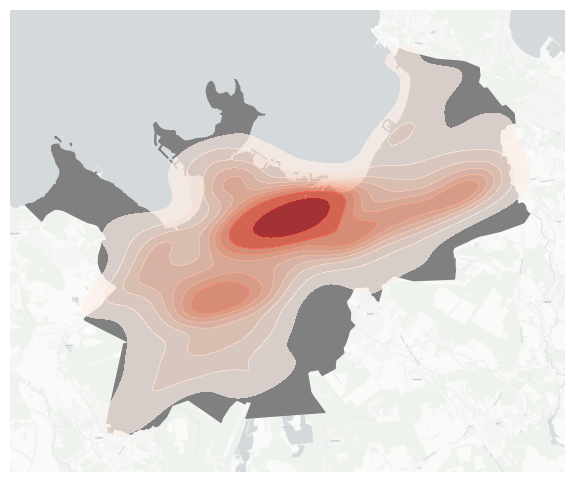

In [58]:
#attempt to create heatmap using geoplot (but the other plot below has been used)
import geoplot

ax = geoplot.webmap(tallinn_bbox, projection=geoplot.crs.WebMercator(), provider=ctx.providers.CartoDB.Positron, zorder=1)

ax = geoplot.polyplot(tallinn_gdf_wgs_84, projection=geoplot.crs.WebMercator(), ax=ax, zorder=2,color="gray")

geoplot.kdeplot(
    road_accidents_tallinn_wgs_84, #clip=tallinn_gdf_wgs_84,
    shade=True, cmap='Reds',
    projection=geoplot.crs.WebMercator(), shade_lowest=False, alpha=0.7, ax=ax, zorder=3)

In [162]:
tallinn_gdf_polygons=tallinn_gdf.explode()

C:\Users\Kasutaja\AppData\Local\Temp\ipykernel_3616\1208683312.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  tallinn_gdf_polygons=tallinn_gdf.explode()


In [163]:
axis = tallinn_gdf_polygons.total_bounds
axis

array([2732932.1939374 , 8256817.29952659, 2774781.14416003,
       8309341.77862306])

In [164]:
#correction of bounding box
axis=np.array([axis[0]-500,axis[1]-500,axis[2]+500,axis[3]-20000])

In [165]:
# Calculate the KDE
import scipy
import seaborn
data = np.c_[road_accidents_tallinn.geometry.x, road_accidents_tallinn.geometry.y]
kde = scipy.stats.gaussian_kde(data.T, bw_method="scott", weights=road_accidents_tallinn.weight)
data_std = data.std(axis=0, ddof=1)
bw_x = getattr(kde, "scotts_factor")() * data_std[0]
bw_y = getattr(kde, "scotts_factor")() * data_std[1]
grid_x = grid_y = 200
x_support = seaborn.utils._kde_support(data[:, 0], bw_x, grid_x, 30, (axis[0], axis[2]))
y_support = seaborn.utils._kde_support(data[:, 1], bw_y, grid_y, 30, (axis[1], axis[3]))
xx, yy = np.meshgrid(x_support, y_support)
levels = kde([xx.ravel(), yy.ravel()]).reshape(xx.shape)

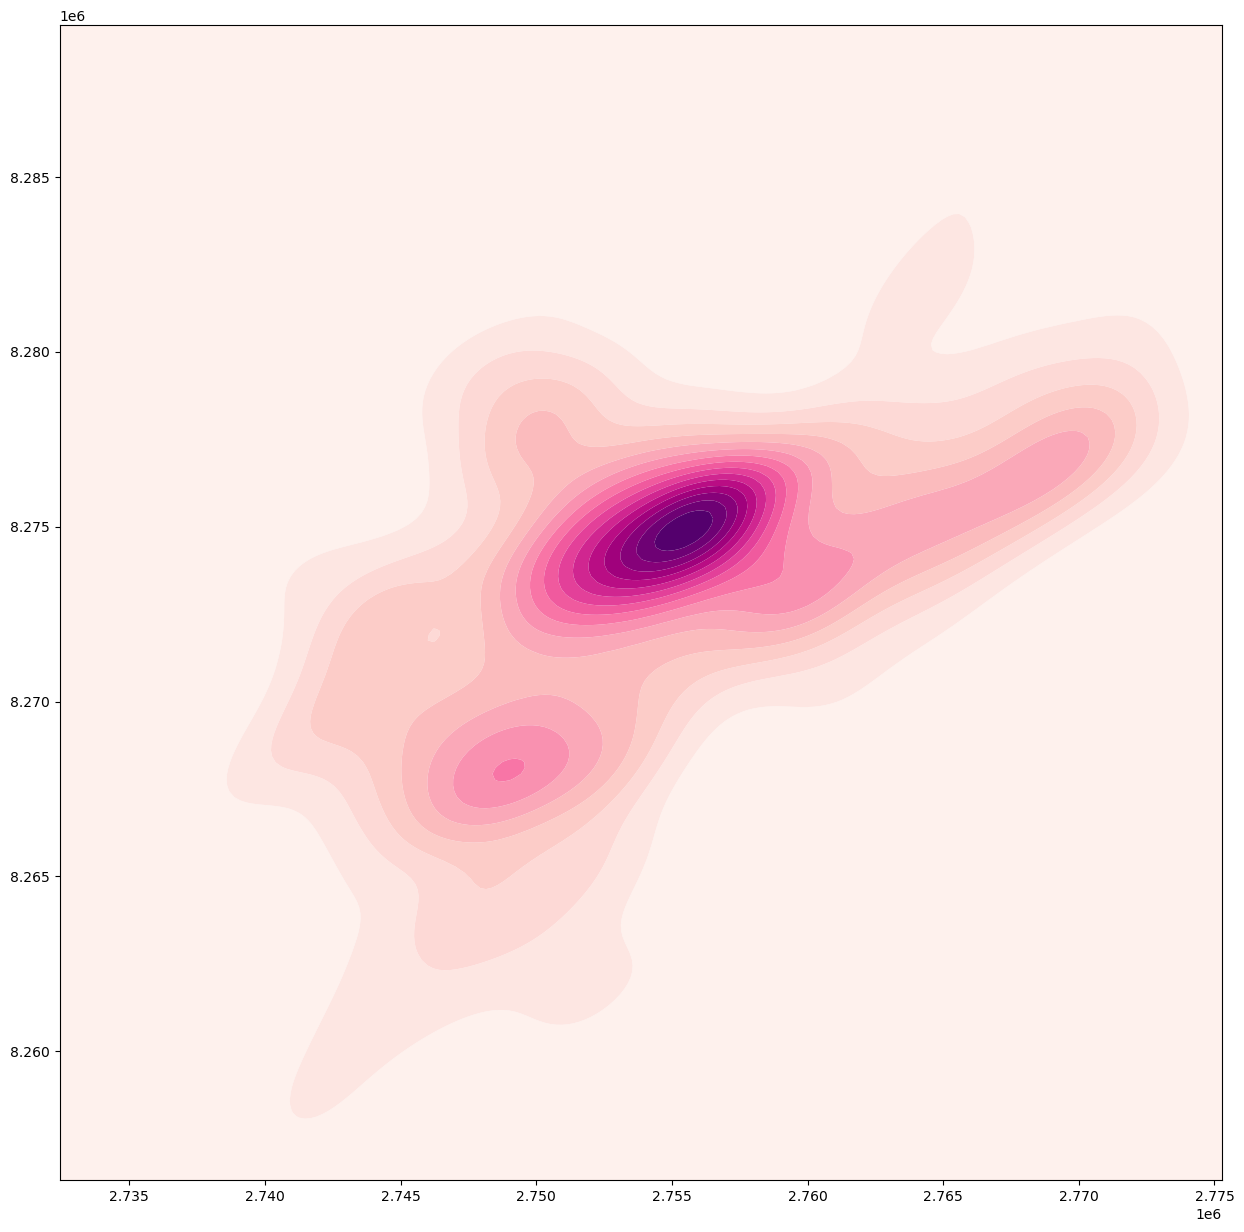

In [166]:
fig,ax = plt.subplots(1,1, figsize=(15,15))

cset = ax.contourf(xx, yy, levels,
    17, zorder=2, 

    cmap='RdPu',
    antialiased=True,
)

In [167]:
#changing opacity
cset.collections[0].set_alpha(0)
for i in range(1,16):
    cset.collections[i].set_alpha(0.6)

In [168]:
def add_basemap(ax, zoom):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, source=ctx.providers.CartoDB.Positron)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    ax.axis((xmin, xmax, ymin, ymax))

In [169]:
add_basemap(ax, zoom=12)

In [170]:
#adding administrative borders of Tallinn
tallinn_gdf.plot(figsize=(10, 10),color="#DEDEDE",linewidth=0.5, edgecolor="#7E0000",ax=ax, zorder=1)

<AxesSubplot: >

<Figure size 640x480 with 0 Axes>

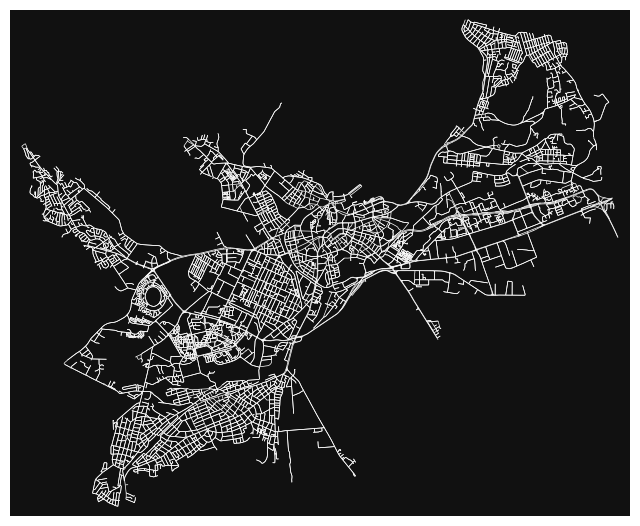

In [171]:
import osmnx as ox
import geopandas as gpd

#drive network of Tallinn
G = ox.graph_from_place("Tallinn, Estonia",network_type="drive")

fig1, ax1 = ox.plot_graph(G,node_size = 0,edge_linewidth = 0.5, edge_color = "white")

In [172]:
nodes, streets = ox.graph_to_gdfs(G)

In [173]:
streets=streets.reset_index()

In [174]:
#selecting only trunk, secondary and primary roads
streets=streets[(streets["highway"]=="trunk")|(streets["highway"]=="secondary")|(streets["highway"]=="primary")]

In [175]:
streets=streets.to_crs("EPSG:3857")

In [176]:
streets["highway"].unique()

array(['secondary', 'primary', 'trunk'], dtype=object)

In [177]:
#adding roads to the plot
streets[streets["highway"]=="primary"].plot(figsize=(10, 10),color="black",linewidth=1.9, ax=ax, zorder=3)
streets[streets["highway"]=="primary"].plot(figsize=(10, 10),color="yellow",linewidth=1.9/2, ax=ax, zorder=3)
streets[streets["highway"]=="secondary"].plot(figsize=(10, 10),color="black",linewidth=1.25, ax=ax, zorder=3)
streets[streets["highway"]=="secondary"].plot(figsize=(10, 10),color="white",linewidth=1.25/2, ax=ax, zorder=3)
streets[streets["highway"]=="trunk"].plot(figsize=(10, 10),color="black",linewidth=1.25, ax=ax, zorder=3)
streets[streets["highway"]=="trunk"].plot(figsize=(10, 10),color="#7FF17F",linewidth=1.25/2, ax=ax, zorder=3)

<AxesSubplot: >

<Figure size 640x480 with 0 Axes>

In [178]:
#custom legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.patheffects as path_effects

custom_lines = [Line2D([0], [0], color="yellow", lw=1.9/2, path_effects=[path_effects.Stroke(linewidth=1.9, foreground='black'), path_effects.Normal()]),
                Line2D([0], [0], color="white", lw=1.25/2, path_effects=[path_effects.Stroke(linewidth=1.25, foreground='black'), path_effects.Normal()]),
                Line2D([0], [0], color="#7FF17F", lw=1.25/2, path_effects=[path_effects.Stroke(linewidth=1.25, foreground='black'), path_effects.Normal()]),
                Patch(facecolor='#DEDEDE', edgecolor='#7E0000',linewidth=0.5)]

ax.legend(custom_lines, ['primary road', 'secondary road', 'trunk', "administrative borders of Tallinn"], loc="upper left", title="Legend")

In [179]:
#scalebar
from matplotlib_scalebar.scalebar import ScaleBar
ax.add_artist(ScaleBar(1, box_alpha=0, location="lower right", pad=-1, border_pad=2, width_fraction=0.003))

In [180]:
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

In [181]:
ax.set_title("Heatmap of road accidents in Tallinn, 2011-2021", fontsize=20, pad=15)

Text(0.5, 1.0, 'Heatmap of road accidents in Tallinn, 2011-2021')

In [182]:
ax.annotate("Author: Petr Anashin\nData: Tallinn's geoportal, Estonian Police \nand Border Guard Board, OpenStreetMaps",xy=(2732932.1939374+42000, 8256817.29952659+1200),horizontalalignment='right')

Text(2774932.1939374, 8258017.29952659, "Author: Petr Anashin\nData: Tallinn's geoportal, Estonian Police \nand Border Guard Board, OpenStreetMaps")

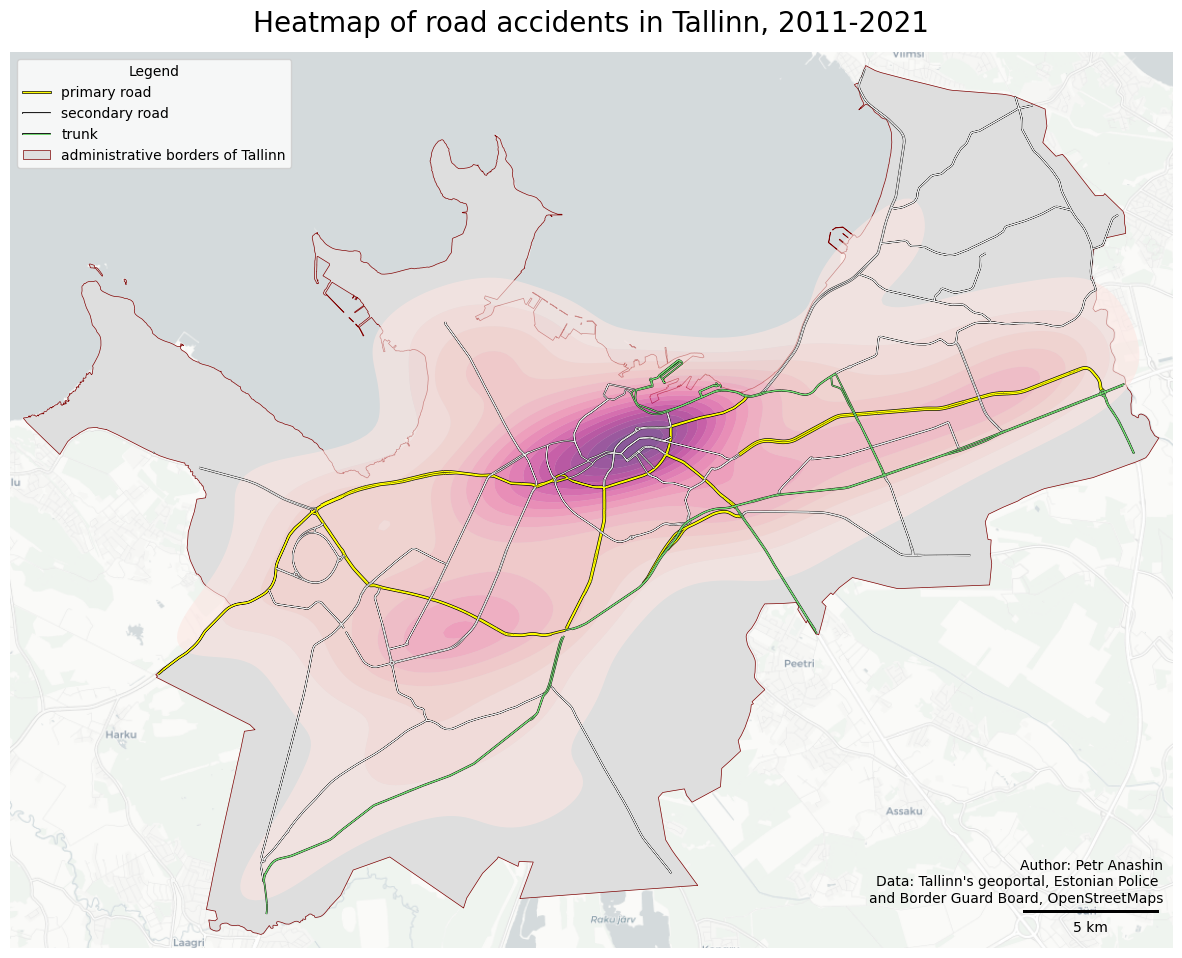

In [183]:
fig

In [184]:
fig.tight_layout()
fig.savefig("heatmap_road_accidents_tallinn.png", dpi=300
       )